In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
filename = 'Tears_of_a_witch_SFA_44100.npz'
y = np.load(filename)['sig']
sr = 44100
print(y.shape, sr)

(6849536,) 44100


In [8]:
# 고조파 타악기 소스 분리(HPSS)
stft = librosa.stft(y)
harmonic, percussive = librosa.decompose.hpss(stft)
y = librosa.istft(harmonic)

In [9]:
hop_len = 512
freq_w = 3
octave = 7

C = librosa.cqt(y, sr=sr, hop_length= hop_len, n_bins= 12*freq_w*octave, bins_per_octave= 12*freq_w)
print(C.shape)
print(C.min(),C.max())

(252, 13379)
(-17.560524+0.2641133j) (17.284327-0.40800297j)


In [10]:
chroma = librosa.feature.chroma_cqt(C=C,sr=sr, hop_length= hop_len, bins_per_octave= 12*freq_w, n_octaves=octave)
print(chroma.shape)
print(chroma.min(),chroma.max())

(12, 13379)
0j (1+9.396924e-06j)


[Text(0.5, 1.0, 'chroma_cqt')]

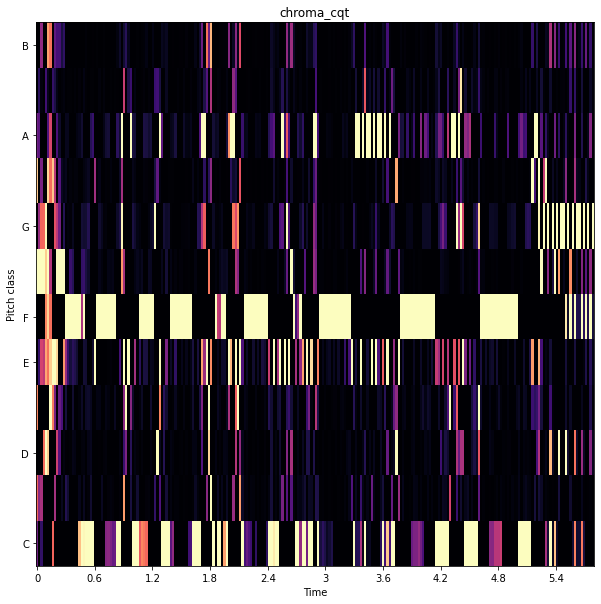

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
img = librosa.display.specshow(chroma[:,:250], y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='chroma_cqt')